In [1]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_curve, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#target_df = pd.read_csv('target.csv')

In [3]:
#target_df.sort_values('fips', inplace= True, ignore_index = True)

In [4]:
#target_df

In [5]:
target1 = pd.read_csv('data/current_target.csv')

In [6]:
df = pd.read_csv('data/tues_clean1.csv')

In [7]:
df.rename(columns = {'FIPS': 'fips'}, inplace = True)

In [8]:
df1 = pd.merge(df, target1, how='left', on = 'fips')

In [9]:
df1.isnull().sum()

fips                           0
Pop_Dens                       0
perc_below_pov                 0
perc_disabled                  0
perc_minority                  0
percent_multiunit_housing      0
perc_overcrowded               0
perc_no_vehicle                0
perc_group_quarters            0
perc_fair_poor_health          0
perc_smokers                   0
perc_obese                     0
perc_phys_inactive             0
prev_hosp_rate_medicare        0
air_pollution                  0
unemployed                     0
age_adjusted_mortality         0
perc_diab                      0
perc_insuf_sleep               0
health_costs                   0
med_house_income               0
wnw_seg                        0
Population                     0
perc_fem                       0
perc_rural                     0
pcp_rate_100k                  0
65_older                       0
17_younger                     0
uninsured                      0
lim_eng                        0
date      

In [31]:
len(df1.columns)

35

In [10]:
df1.fillna(value = 0, inplace = True)

df1

,fips,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,perc_fair_poor_health,...,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng,date,county,state,cases,deaths
0,1001,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,...,74.0,14.65,24.30,8.05,0.80,2020-05-14,Autauga,Alabama,104.0,4.0
1,1003,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,...,117.0,19.60,21.80,11.10,0.65,2020-05-14,Baldwin,Alabama,243.0,8.0
2,1005,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,...,69.0,18.00,21.10,12.10,1.55,2020-05-14,Barbour,Alabama,74.0,1.0
3,1007,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,...,128.0,15.85,20.75,9.95,0.35,2020-05-14,Bibb,Alabama,46.0,1.0
4,1009,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,...,33.0,17.90,23.30,12.50,1.80,2020-05-14,Blount,Alabama,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,...,88.0,10.60,26.85,12.00,1.85,2020-05-14,Sweetwater,Wyoming,21.0,0.0
3138,56039,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,...,229.0,13.55,19.00,12.50,3.95,2020-05-14,Teton,Wyoming,99.0,1.0
3139,56041,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,...,106.0,12.35,29.45,12.10,1.00,2020-05-14,Uinta,Wyoming,9.0,0.0
3140,56043,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,...,97.0,20.80,23.90,16.20,0.50,2020-05-14,Washakie,Wyoming,7.0,0.0


In [11]:
df1.to_csv('data/socio_health_covid1.csv', index =False)

In [12]:
y1df = df1['cases']
y1 =y1df.values

In [13]:
y2df = (df1['cases']/df1['Population'])
y2 = y2df.values

In [14]:
y3df = (df1['deaths']/df1['cases'])
y3 = y3df.values

In [15]:
y3df.isnull().sum()

248

In [16]:
y3df.fillna(value=0, inplace = True)

In [17]:
y3df.isnull().sum()

0

In [18]:
y = y3df.values


In [19]:
Xdf = df.drop(columns = ['fips', 'Population'])

In [20]:
X = Xdf.values

In [27]:
Xdf.columns

Index(['Pop_Dens', 'perc_below_pov', 'perc_disabled', 'perc_minority',
       'percent_multiunit_housing', 'perc_overcrowded', 'perc_no_vehicle',
       'perc_group_quarters', 'perc_fair_poor_health', 'perc_smokers',
       'perc_obese', 'perc_phys_inactive', 'prev_hosp_rate_medicare',
       'air_pollution', 'unemployed', 'age_adjusted_mortality', 'perc_diab',
       'perc_insuf_sleep', 'health_costs', 'med_house_income', 'wnw_seg',
       'perc_fem', 'perc_rural', 'pcp_rate_100k', '65_older', '17_younger',
       'uninsured', 'lim_eng'],
      dtype='object')

### Predicting Cummulative Cases (raw)

X_train1, X_test1, y_train1, y_test1 = train_test_split(Xdf, y1df)

rf = RandomForestRegressor()
rf.fit(X_train1, y_train1)

rf.score(X_test1, y_test1)

rf.fit(X_train1, y_train1)

feature_scores = pd.Series(rf.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(12,12))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

imp = importances(rf, X_test1, y_test1, n_samples=-1)
viz = plot_importances(imp)
viz.view()

lr = LinearRegression()
lr.fit(train1, y_train1)

lr.score(X_test1, y_test1)

### Predicting Cummulative cases per population

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xdf, y2df)

rf = RandomForestRegressor()
rf.fit(X_train2, y_train2)

rf.score(X_test2, y_test2)

rf.fit(X_train2, y_train2)

feature_scores = pd.Series(rf.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(12,12))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

imp = importances(rf, X_test2, y_test2, n_samples=-1)
viz = plot_importances(imp)
viz.view()

lr = LinearRegression()
lr.fit(X_train2, y_train2)

lr.score(X_test2, y_test2)

### Predicting Cummulative Deaths rate

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)

-0.12270177590708697

In [24]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.034529352076301936
Mean Squared Error: 0.0026683693955235443
Root Mean Squared Error: 0.05165626191976675


Text(0.5, 0, 'Average contribution of information gain')

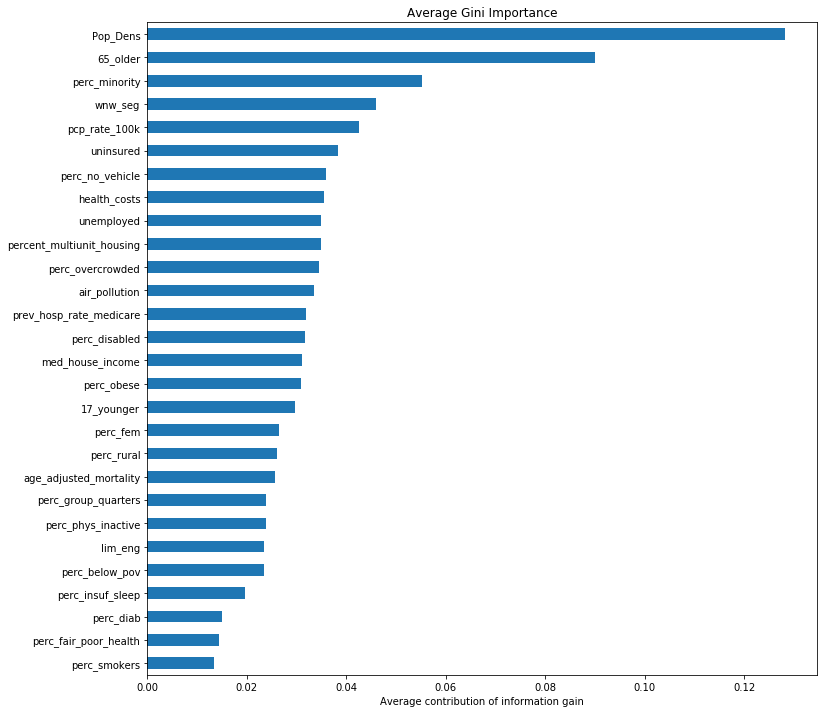

In [25]:
rf.fit(X_train, y_train)

feature_scores = pd.Series(rf.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(12,12))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

In [ ]:
imp = importances(rf, X_test3, y_test3, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.037099291995547734

# MORE CLEANING

In [ ]:
Xdf.drop(columns = ['perc_group_quarters'], inplace =True)

In [ ]:
Xdf.drop(columns = ['pcp_rate_100k'], inplace =True)

In [28]:
Xdf.drop(columns = ['17_younger'], inplace =True)

In [ ]:
Xdf.drop(columns = ['prev_hosp_rate_medicare'], inplace =True)

In [ ]:
Xdf.columns

In [ ]:
X1df = Xdf[['Pop_Dens', 'perc_below_pov', 'perc_disabled', 'perc_minority',
       'percent_multiunit_housing', 'perc_overcrowded', 'perc_no_vehicle', 'perc_obese',
       'perc_phys_inactive', 'air_pollution', 'unemployed',
       'age_adjusted_mortality', 'perc_diab', 'perc_insuf_sleep',
       'health_costs', 'med_house_income', 'wnw_seg', 'perc_fem', 'perc_rural',
       '65_older', 'uninsured', 'lim_eng']]

In [ ]:
X2df= Xdf[['Pop_Dens', 'perc_below_pov', 'perc_disabled', 'perc_minority',
       'percent_multiunit_housing', 'perc_overcrowded', 'perc_no_vehicle',
       'perc_fair_poor_health', 'perc_smokers', 'perc_obese',
       'perc_phys_inactive', 'air_pollution', 'unemployed',
       'age_adjusted_mortality', 'perc_diab', 'perc_insuf_sleep',
       'health_costs', 'med_house_income', 'wnw_seg', 'perc_rural',
       '65_older', 'uninsured']]

# THIRD FIT

**import dataframes**

In [ ]:
sociohealth = pd.read_csv('data/sociohealth.csv')

In [ ]:
sociohealth

In [ ]:
deaths_time = pd.read_csv('data/death_time_series.csv')

In [ ]:
deaths_time

In [ ]:
cases_time = pd.read_csv('data/cases_time_series.csv')

In [ ]:
cases_time

In [ ]:
metadata_byday = pd.read_csv('data/metadata_byday.csv')

In [ ]:
metadata_byday

In [ ]:
state_orders = pd.read_csv('data/state_orders.csv')

In [ ]:
state_orders 